# TensorFlow 2.0 介紹

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/taipeitechmmslab/MMSLAB-TF2/blob/master/Lab1.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/taipeitechmmslab/MMSLAB-TF2/blob/master/Lab1.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

In [1]:
import tensorflow as tf

TensorFlow 的基本型態：

In [2]:
# 產生一個常數
c = tf.constant(1)
# 產生一個變數
v = tf.Variable(1)
print(c)
print(v)

tf.Tensor(1, shape=(), dtype=int32)
<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=1>


零階張量稱為標量。

In [3]:
import tensorflow as tf
x = tf.constant(4)
print(x)  # 顯示Tensor 常數資訊，Shape=()表示標量，dtype=int32 表示整數
print("{} 階Tensor".format(x.ndim))  # 顯示Tensor 的維度

tf.Tensor(4, shape=(), dtype=int32)
0 階Tensor


一階張量稱為向量。

In [4]:
x = tf.constant([1, 2, 3, 4, 5, 6]) 
print("{}階Tensor ".format(x.ndim))    # 顯示Tensor的維度

1階Tensor 


二階張量稱為矩陣。

In [5]:
x = tf.constant([[1, 2, 3], [4, 5, 6]])
print("{}階Tensor ".format(x.ndim))    # 顯示Tensor的維度

2階Tensor 


---
## Eager Execution


TensorFlow 引入了「Eager Execution」動態圖模式，這個模式在TensorFlow2.0為預設模式，不同與以往的靜態圖模式需要建立計算圖才能執行，Eager Execution模式一旦執行就會返回數值。這使TensorFlow 更容易入門，也使研發更直觀。

**Eager Execution 的優點如下：**

- 立即返回數值，方便除錯。
- 無需 Session.run() 就可以把它們的值返回到 Python。
- 為自定義和高階梯度提供強大支援。
- 幾乎所有 TensorFlow 運算都適用。


**TensorFlow 1.x 和 TensorFlow2.0比較：**
```
TensorFlow 1.x code:
>>> a = tf.constant(1)
>>> print(a)
Tensor("Const_5:0", shape=(), dtype=int32)

>>> sess = tf.Session()
>>> print("a = {}".format(sess.run(a)))
a = 1


TensorFlow 2.0 code:
>>> a = tf.constant(1)
>>> print(a)
tf.Tensor(1, shape=(), dtype=int32)
```

**TensorFlow 基本運算：**

Import 必要套件

In [6]:
import numpy as np
import tensorflow as tf

print("Eager Execution 是否啟動: {}".format(tf.executing_eagerly()))

Eager Execution 是否啟動: True


定義常數 Tensor

In [7]:
a = tf.constant(3)
b = tf.constant(4)
print("a = {}".format(a))
print("b = {}".format(b))

a = 3
b = 4


檢查資料型態

In [8]:
print(a)
print(b)

tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)


基本的運算

In [9]:
c = a + b
print("a + b = {}".format(c))
d = a * b
print("a * b = {}".format(d))

a + b = 7
a * b = 12


2D Tensor 的運算，在Eager Execution模式下可以混和 Tensor 和 Numpy 做運算

In [10]:
a = tf.constant([[1., 2.], [3., 4.]], dtype=tf.float32)
b = np.array([[1., 0.], [2., 3.]], dtype=np.float32)
print("a constant: {}D Tensor".format(a.ndim))

c = a + b
print("a + b = \n{}".format(c))
d = tf.matmul(a, b)
print("a * b = \n{}".format(d))

a constant: 2D Tensor
a + b = 
[[2. 2.]
 [5. 7.]]
a * b = 
[[ 5.  6.]
 [11. 12.]]


輸出的結果為 Tensor 格式，我們可以將它轉為 Numpy 格式

In [11]:
print(c)
print("NumpyArray:\n {}".format(c.numpy()))

tf.Tensor(
[[2. 2.]
 [5. 7.]], shape=(2, 2), dtype=float32)
NumpyArray:
 [[2. 2.]
 [5. 7.]]


計算梯度

In [12]:
w = tf.Variable([[1.0]])
with tf.GradientTape() as tape:
    loss = w * w

grad = tape.gradient(loss, w)
print(grad)

tf.Tensor([[2.]], shape=(1, 1), dtype=float32)


---
## Keras

TensorFlow2.0將Keras納為內建高階API，因此不必再而外安裝keras套件，直接透過`tf.keras`指令使用。相較於`tf.keras`和`keras`的差別，`tf.keras`更能全面支援tensorflow的指令與模式，例如支援Eager Exection, tf.data, TPU訓練等等。

下面將會介紹兩種最常使用的網路搭建方法：
- Sequential Model (序列模型)
- Function API (函數式模型)

### Import 必要套件

In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
from IPython.display import Image

### Sequential Model

Sequential Model有兩種方法搭建，下面為分類問題範例：輸入為28x28 (拉平為784的一維向量)的影像，輸出為10 (分為十個類別)。

**Ex1：**

In [14]:
model = keras.Sequential(name='Sequential')
model.add(layers.Dense(64, activation='relu', input_shape=(784,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

**Ex2：**

In [15]:
model = tf.keras.Sequential([layers.Dense(64, activation='relu', input_shape=(784,)),
                             layers.Dense(64, activation='relu'), 
                             layers.Dense(10, activation='softmax')])

顯示出剛剛搭建的網路

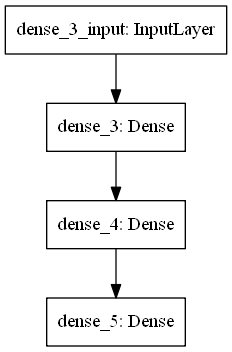

In [16]:
# 產生網絡拓撲圖
plot_model(model, to_file='Sequential_Model.png')

# 秀出網絡拓撲圖
Image('Sequential_Model.png')

### Functional API
**1. Sample Network：**使用Functional API 一樣可以快速幾行代碼完成和上面Sequential Model 相同的架構。

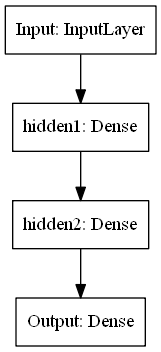

In [17]:
inputs = keras.Input(shape=(784,), name='Input')
hidden1 = layers.Dense(64, activation='relu', name='hidden1')(inputs)
hidden2 = layers.Dense(64, activation='relu', name='hidden2')(hidden1)
outputs = layers.Dense(10, activation='softmax', name='Output')(hidden2)

model = keras.Model(inputs=inputs, outputs=outputs)

# 產生網絡拓撲圖
plot_model(model, to_file='Functional_API_Sample_Model.png')

# 秀出網絡拓撲圖
Image('Functional_API_Sample_Model.png')

**Multi Input Model：**多輸入單輸出模型，下面的範例為商品價格預測，要預測商品價格，我們需要商品照片、品牌、使用狀況等等。而商品圖片和品牌我們可以經過不同層輸入並做不同的處理，網路架構如下。

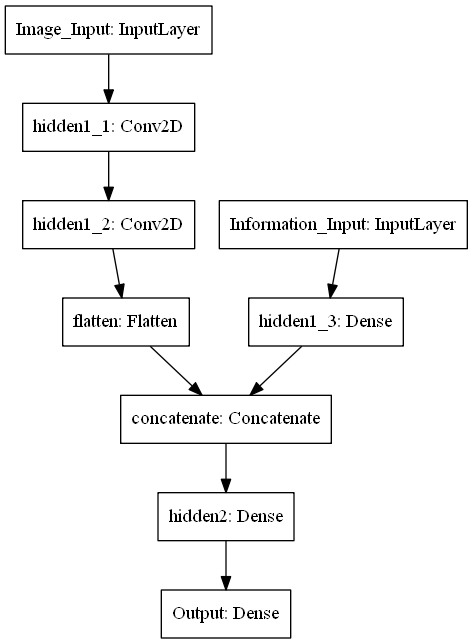

In [18]:
img_input = keras.Input(shape=(28, 28, 1), name='Image_Input')
info_input = keras.Input(shape=(1, ), name='Information_Input')

hidden1_1 = layers.Conv2D(64, kernel_size=5, strides=2, activation='relu', name='hidden1_1')(img_input)
hidden1_2 = layers.Conv2D(32, kernel_size=5, strides=2, activation='relu', name='hidden1_2')(hidden1_1)
hidden1_2_ft= layers.Flatten()(hidden1_2)
hidden1_3 = layers.Dense(64, activation='relu', name='hidden1_3')(info_input)
concat = layers.Concatenate()([hidden1_2_ft, hidden1_3])
hidden2 = layers.Dense(64, activation='relu', name='hidden2')(concat)
outputs = layers.Dense(1, name='Output')(hidden2)

model = keras.Model(inputs=[img_input, info_input], outputs=outputs)

# 產生網絡拓撲圖
plot_model(model, to_file='Functional_API_Multi_Input_Model.png')

# 秀出網絡拓撲圖
Image('Functional_API_Multi_Input_Model.png')

**Multi Output Network：**單輸入多輸出模型，這種類型的架構在影響處理的領域很長看到，下面舉幾個常見多輸出模型應用例子。

- 物件偵測：輸入一張圖像，預測物件位置與物件類別等。
- 人像識別：輸入一張圖像，預測圖片中人的性別、年齡等。

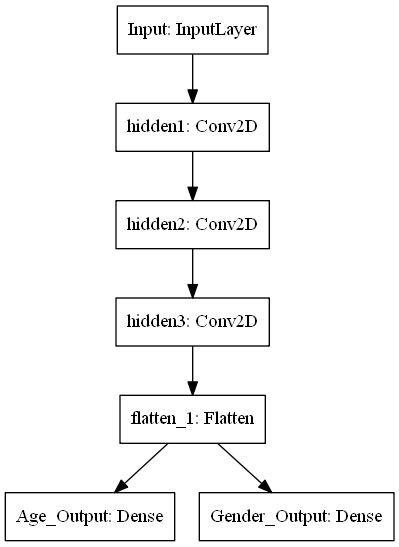

In [19]:
inputs = keras.Input(shape=(28, 28, 1), name='Input')

hidden1 = layers.Conv2D(64, kernel_size=3, activation='relu', name='hidden1')(inputs)
hidden2 = layers.Conv2D(64, kernel_size=3, strides=2, activation='relu', name='hidden2')(hidden1)
hidden3 = layers.Conv2D(64, kernel_size=3, strides=2, activation='relu', name='hidden3')(hidden2)
flatten = layers.Flatten()(hidden3)

age_output = layers.Dense(1, name='Age_Output')(flatten)
gender_output = layers.Dense(1, name='Gender_Output')(flatten)

model = keras.Model(inputs=inputs, outputs=[age_output, gender_output])

# 產生網絡拓撲圖
plot_model(model, to_file='Functional_API_Multi_Output_Model.png')

# 秀出網絡拓撲圖
Image('Functional_API_Multi_Output_Model.png')

**Multi Input and Multi Output Network：**多輸入多輸出模型，例如天氣預測，輸入可能為當前的天氣資訊和衛星雲圖，而輸出就是降雨機率、溫度和濕度等。

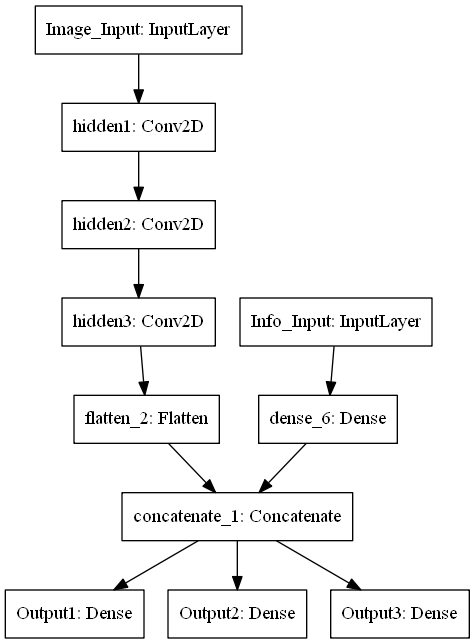

In [20]:
image_inputs = keras.Input(shape=(28, 28, 1), name='Image_Input')
hidden1 = layers.Conv2D(64, kernel_size=3, activation='relu', name='hidden1')(image_inputs)
hidden2 = layers.Conv2D(64, kernel_size=3, strides=2, activation='relu', name='hidden2')(hidden1)
hidden3 = layers.Conv2D(64, kernel_size=3, strides=2, activation='relu', name='hidden3')(hidden2)
flatten = layers.Flatten()(hidden3)

info_inputs = keras.Input(shape=(10, ), name='Info_Input')
hidden4 = layers.Dense(64)(info_inputs)

concat = layers.Concatenate()([flatten, hidden4])

weather_outputs = layers.Dense(1, name='Output1')(concat)
temp_outputs = layers.Dense(1, name='Output2')(concat)
humidity_outputs = layers.Dense(1, name='Output3')(concat)

model = keras.Model(inputs=[image_inputs, info_inputs], 
                    outputs=[weather_outputs, temp_outputs, humidity_outputs])

# 產生網絡拓撲圖
plot_model(model, to_file='Functional_API_Multi_Input_Multi_Output_Model.png')

# 秀出網絡拓撲圖
Image('Functional_API_Multi_Input_Multi_Output_Model.png')

---
## tf.data

### 基本操作

1.`tf.data.Dataset.from_tensors`

In [21]:
dataset = tf.data.Dataset.from_tensors(tf.constant([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], shape=(10, )))
print(dataset)

<TensorDataset shapes: (10,), types: tf.int32>


2.`tf.data.Dataset.from_tensor_slices`

In [22]:
x_data = tf.data.Dataset.from_tensor_slices(tf.constant([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], shape=(10, )))
print(x_data)

y_data = tf.data.Dataset.from_tensor_slices(tf.constant([0, 2, 4, 6, 8, 10, 12, 14, 16, 18], shape=(10, )))
print(y_data)

<TensorSliceDataset shapes: (), types: tf.int32>
<TensorSliceDataset shapes: (), types: tf.int32>


3.`for loop`讀取數據：

In [23]:
for data in dataset:
    print(data)

tf.Tensor([ 1  2  3  4  5  6  7  8  9 10], shape=(10,), dtype=int32)


In [24]:
for data1, data2 in zip(x_data, y_data):
    print('x: {}, y: {}'.format(data1, data2))

x: 0, y: 0
x: 1, y: 2
x: 2, y: 4
x: 3, y: 6
x: 4, y: 8
x: 5, y: 10
x: 6, y: 12
x: 7, y: 14
x: 8, y: 16
x: 9, y: 18


3.`take`：讀取資料

In [25]:
for data in dataset:
    print(data)

tf.Tensor([ 1  2  3  4  5  6  7  8  9 10], shape=(10,), dtype=int32)


In [26]:
for data1, data2 in zip(x_data.take(5), y_data.take(5)):
    print('x: {}, y: {}'.format(data1, data2))

x: 0, y: 0
x: 1, y: 2
x: 2, y: 4
x: 3, y: 6
x: 4, y: 8


In [28]:
for data1, data2 in zip(x_data.take(12), y_data.take(12)):
    print('x: {}, y: {}'.format(data1, data2))

x: 0, y: 0
x: 1, y: 2
x: 2, y: 4
x: 3, y: 6
x: 4, y: 8
x: 5, y: 10
x: 6, y: 12
x: 7, y: 14
x: 8, y: 16
x: 9, y: 18


5.`tf.data.Dataset.zip`

In [29]:
dataset = tf.data.Dataset.zip((x_data, y_data))
print(dataset)

<ZipDataset shapes: ((), ()), types: (tf.int32, tf.int32)>


6.`map`：可以使用map來轉換數據

In [30]:
tf.data.Dataset.range(10).map(lambda x: x*2)

<MapDataset shapes: (), types: tf.int64>

7.命名：可以字典方式為elements的組件命名

In [40]:
x = tf.data.Dataset.range(10)
y = tf.data.Dataset.range(10).map(lambda x: x*2)

dataset = tf.data.Dataset.zip({"x": x, "y": y})
print(dataset)

<ZipDataset shapes: {x: (), y: ()}, types: {x: tf.int64, y: tf.int64}>


In [39]:
for data in dataset.take(10):
    print('x: {}, y: {}'.format(data['x'], data['y']))

x: 0, y: 0
x: 1, y: 2
x: 2, y: 4
x: 3, y: 6
x: 4, y: 8
x: 5, y: 10
x: 6, y: 12
x: 7, y: 14
x: 8, y: 16
x: 9, y: 18


8.設定每batch讀取的數量

In [43]:
dataset = tf.data.Dataset.zip({"x": x, "y": y}).batch(2)

for data in dataset.take(5):
    print('x: {}, y: {}'.format(data['x'], data['y']))

x: [0 1], y: [0 2]
x: [2 3], y: [4 6]
x: [4 5], y: [ 8 10]
x: [6 7], y: [12 14]
x: [8 9], y: [16 18]


9.`shuffle`：dataset資料 會被載入buffer中，並從buffer中隨機選取資料出來，取出資料產生的空位會從新的數據替補。而`buffer_size`是設定buffer大小，最好的設定是**大於**或**等於**整個dataset資料個個數。

In [44]:
dataset = dataset.shuffle(10)
for data in dataset.take(5):
    print('x: {}, y: {}'.format(data['x'], data['y']))

x: [4 5], y: [ 8 10]
x: [0 1], y: [0 2]
x: [2 3], y: [4 6]
x: [8 9], y: [16 18]
x: [6 7], y: [12 14]


10.`repeat`：當dataset的資料讀取完後就讀會取不到資料，透過設定`repeat(n)`可以重複讀取dataset n次。

In [45]:
for data in dataset.take(10):
    print('x: {}, y: {}'.format(data['x'], data['y']))

    
print('-' * 50)
dataset = dataset.repeat(2)
for data in dataset.take(10):
    print('x: {}, y: {}'.format(data['x'], data['y']))

x: [8 9], y: [16 18]
x: [6 7], y: [12 14]
x: [4 5], y: [ 8 10]
x: [0 1], y: [0 2]
x: [2 3], y: [4 6]
--------------------------------------------------
x: [2 3], y: [4 6]
x: [6 7], y: [12 14]
x: [8 9], y: [16 18]
x: [4 5], y: [ 8 10]
x: [0 1], y: [0 2]
x: [6 7], y: [12 14]
x: [4 5], y: [ 8 10]
x: [8 9], y: [16 18]
x: [0 1], y: [0 2]
x: [2 3], y: [4 6]
